# **Model Building**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing The Model Building Libraries**

In [2]:
#Importing Neccessary Libraries

import numpy as np
#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers # a layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense, Flatten 
#Flatten-used fot flattering the input or change the dimension
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout #convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
#performing data augmentation to train the data
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data augmentation to test the data
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')


Found 2626 images belonging to 5 classes.
Found 2626 images belonging to 5 classes.


In [5]:
print(x_train.class_indices)#checking  the no. of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


# **Initializing The Model**

In [6]:
model = Sequential()

# **Adding CNN Layers**

In [7]:
classifier = Sequential()

In [8]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64,64,3),activation='relu'))

In [9]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
classifier.add(Conv2D(32, (3,3),activation='relu'))

In [11]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
classifier.add(Flatten())

# **Adding Dense Layers**

In [13]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5,activation='softmax'))

In [14]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

# **Configure The Learning Process**

In [15]:
###Compiling the model

In [16]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **Train The Model**

In [17]:
classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20,validation_data=x_test,validation_steps = len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
526/526 [==============================] - 649s 1s/step - loss: 0.1495 - accuracy: 0.9455 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 2/20
526/526 [==============================] - 37s 70ms/step - loss: 0.0103 - accuracy: 0.9973 - val_loss: 8.4749e-05 - val_accuracy: 1.0000
Epoch 3/20
526/526 [==============================] - 37s 71ms/step - loss: 0.0113 - accuracy: 0.9943 - val_loss: 7.8064e-05 - val_accuracy: 1.0000
Epoch 4/20
526/526 [==============================] - 41s 77ms/step - loss: 1.6585e-04 - accuracy: 1.0000 - val_loss: 6.4115e-05 - val_accuracy: 1.0000
Epoch 5/20
526/526 [==============================] - 41s 77ms/step - loss: 7.6087e-05 - accuracy: 1.0000 - val_loss: 1.2573e-05 - val_accuracy: 1.0000
Epoch 6/20
526/526 [==============================] - 47s 90ms/step - loss: 2.9585e-05 - accuracy: 1.0000 - val_loss: 7.1258e-06 - val_accuracy: 1.0000
Epoch 7/20
526/526 [==============================] - 38s 72ms/step - loss: 2.6282e-05 - accuracy: 1.0000

# **Save The Model**

In [18]:
###Saving our model

In [19]:
classifier.save('nutrition.h5')

# **Test The Model**

In [20]:
import numpy as np
from tensorflow.keras.models  import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model = load_model('nutrition.h5')

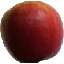

In [22]:
img = image.load_img(r'/content/drive/MyDrive/Dataset/TRAIN_SET/APPLES/5_100.jpg',grayscale=False,target_size= (64,64))
img

In [23]:
import numpy as np
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

In [24]:
x.shape

(1, 64, 64, 3)

In [25]:
pred = np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 127ms/step


In [26]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']

In [27]:
index[pred[0]]

'APPLES'